In [28]:
import numpy as np
import matlab.engine
import os
import signal
import time
import scipy.io as sio
import time
import subprocess
import matplotlib.pyplot as plt

In [29]:
forward_tx_gain = 5
forward_rx_gain = 12
backward_tx_gain = 10
backward_rx_gain = 15

In [30]:

string1 = 'python3 TX_Feedback.py -tx_gain ' + str(forward_tx_gain)
string2 = 'python3 RX_Feedback.py -rx_gain ' + str(forward_rx_gain)
string3 = 'python3 TX_Feedback.py -rx_gain ' + str(backward_rx_gain)
string4 = 'python3 RX_Feedback.py -tx_gain ' + str(backward_tx_gain)

In [31]:
# Message generation
subprocess.call(string1 + ' -dev_type encoder -num 1', shell= True)


PROCESS BEGINS

TX Encoder 1 generated
TX Transmission 1 starts


0

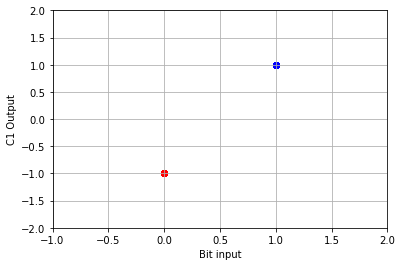

In [32]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

C1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/C1_Output.mat')
C1_Output = C1_Output['C_Output']


plt.scatter(Bit_Input[np.where(Bit_Input==0)], C1_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(Bit_Input[np.where(Bit_Input==1)], C1_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Bit input')
plt.ylabel('C1 Output')
plt.grid(True)
plt.xlim([-1, 2])
plt.ylim([-2, 2])
plt.show()

In [33]:
# Receiver receives first message
subprocess.call(string2 + ' -dev_type decoder -num 1', shell= True)

# Transmitter process kill
subprocess.call('python3 /home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/flowgraph_process_kill.py', shell= True)

RX Reception 11 starts
Capture : 1 ...
Capture done
Frame: 0  SNR:  25.77  BER: 0.2374

All frames captured

Process Successfully terminated


0

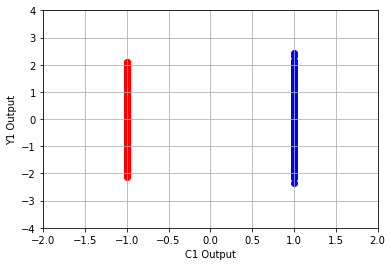

In [34]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

C1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/C1_Output.mat')
C1_Output = C1_Output['C_Output']

Y1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y1_Output.mat')
Y1_Output = Y1_Output['YL']


plt.scatter(C1_Output[np.where(Bit_Input==0)], Y1_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(C1_Output[np.where(Bit_Input==1)], Y1_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('C1 Output')
plt.ylabel('Y1 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-4, 4])
plt.show()

In [35]:
# first Feedback prepared by receiver
subprocess.call(string4 + ' -dev_type encoder -num 1', shell= True)

RX Encoder 1 generated
RX Transmission1 starts


0

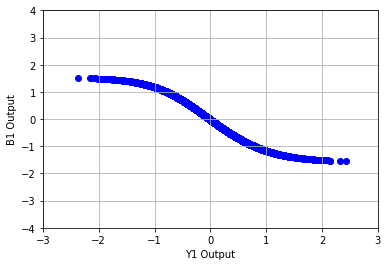

In [36]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

Y1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y1_Output.mat')
Y1_Output = Y1_Output['YL']

B1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/B1_Output.mat')
B1_Output = B1_Output['B_Output']


plt.scatter(Y1_Output[np.where(Bit_Input==0)], B1_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(Y1_Output[np.where(Bit_Input==1)], B1_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Y1 Output')
plt.ylabel('B1 Output')
plt.grid(True)
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()

In [37]:
# Transmitter received feedback
subprocess.call(string3 + ' -dev_type decoder -num 1', shell= True)

# Receiver transmitter process killed
subprocess.call('python3 flowgraph_process_kill.py', shell= True)

TX Reception 1 starts
Capture : 1 ...
Capture done
Frame: 0  SNR:  28.17

All frames captured

Process Successfully terminated


0

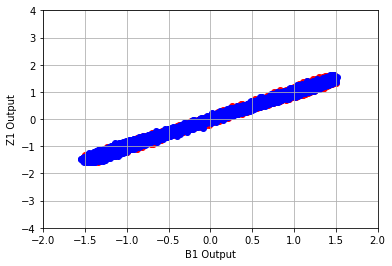

In [38]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

B1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/B1_Output.mat')
B1_Output = B1_Output['B_Output']

Z1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Z1_Output.mat')
Z1_Output = Z1_Output['ZL']


plt.scatter(B1_Output[np.where(Bit_Input==0)], Z1_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(B1_Output[np.where(Bit_Input==1)], Z1_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('B1 Output')
plt.ylabel('Z1 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-4, 4])
plt.show()

In [39]:
# Feedback received and second transmission prepared
subprocess.call(string1 + ' -dev_type encoder -num 2', shell= True)


PROCESS BEGINS

TX Encoder 1 generated
TX Transmission 1 starts


0

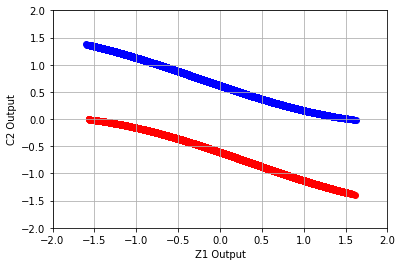

In [40]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

Z1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Z1_Output.mat')
Z1_Output = Z1_Output['ZL']

C2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/C2_Output.mat')
C2_Output = C2_Output['C_Output']


plt.scatter(Z1_Output[np.where(Bit_Input==0)], C2_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(Z1_Output[np.where(Bit_Input==1)], C2_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Z1 Output')
plt.ylabel('C2 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [41]:
# Receiver receives second message
subprocess.call(string2 + ' -dev_type decoder -num 2', shell= True)

# Transmitter process kill
subprocess.call('python3 /home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/flowgraph_process_kill.py', shell= True)

RX Reception 21 starts
Capture : 1 ...
Capture done
Frame: 0  SNR:  28.51

All frames captured

Process Successfully terminated


0

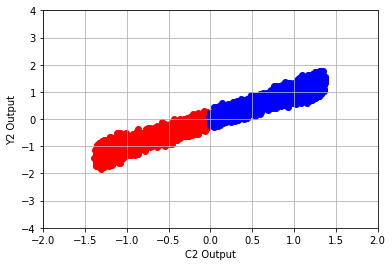

In [42]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

C2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/C2_Output.mat')
C2_Output = C2_Output['C_Output']

Y2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y2_Output.mat')
Y2_Output = Y2_Output['YL']


plt.scatter(C2_Output[np.where(Bit_Input==0)], Y2_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(C2_Output[np.where(Bit_Input==1)], Y2_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('C2 Output')
plt.ylabel('Y2 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-4, 4])
plt.show()

In [43]:
# final feedback Feedback prepared by receiver
subprocess.call(string4 + ' -dev_type encoder -num 2', shell= True)

RX Encoder 1 generated
RX Transmission2 starts


0

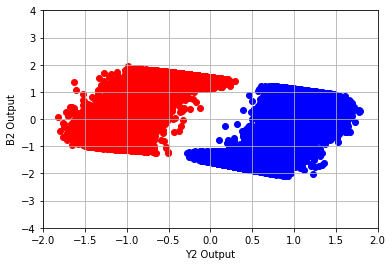

In [44]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

Y2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y2_Output.mat')
Y2_Output = Y2_Output['YL']

B2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/B2_Output.mat')
B2_Output = B2_Output['B_Output']


plt.scatter(Y2_Output[np.where(Bit_Input==0)], B2_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(Y2_Output[np.where(Bit_Input==1)], B2_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Y2 Output')
plt.ylabel('B2 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-4, 4])
plt.show()

In [45]:
# Transmitter receives second feedback
subprocess.call(string3 +' -dev_type decoder -num 2', shell= True)

# Receiver transmitter process killed
subprocess.call('python3 flowgraph_process_kill.py', shell= True)

TX Reception 1 starts
Capture : 1 ...
Capture done
Frame: 0  SNR:  27.40

All frames captured

Process Successfully terminated


0

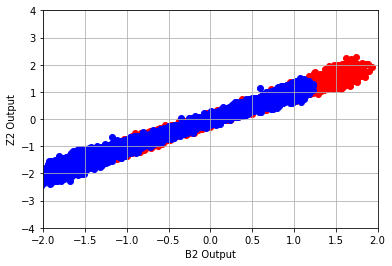

In [46]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

B2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/B2_Output.mat')
B2_Output = B2_Output['B_Output']

Z2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Z2_Output.mat')
Z2_Output = Z2_Output['ZL']


plt.scatter(B2_Output[np.where(Bit_Input==0)], Z2_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(B2_Output[np.where(Bit_Input==1)], Z2_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('B2 Output')
plt.ylabel('Z2 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-4, 4])
plt.show()

In [47]:
# Feedback received and second transmission prepared
subprocess.call(string1 + ' -dev_type encoder -num 3', shell= True)


PROCESS BEGINS

TX Encoder 1 generated
TX Transmission 1 starts


0

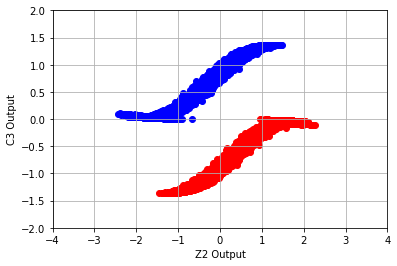

In [48]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

Z2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Z2_Output.mat')
Z2_Output = Z2_Output['ZL']

C3_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/C3_Output.mat')
C3_Output = C3_Output['C_Output']


plt.scatter(Z2_Output[np.where(Bit_Input==0)], C3_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(Z2_Output[np.where(Bit_Input==1)], C3_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Z2 Output')
plt.ylabel('C3 Output')
plt.grid(True)
plt.xlim([-4, 4])
plt.ylim([-2, 2])
plt.show()

In [49]:
# Receiver receives final message
subprocess.call(string2 + ' -dev_type decoder -num 3', shell= True)

# Transmitter process kill
subprocess.call('python3 /home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/flowgraph_process_kill.py', shell= True)

RX Reception 31 starts
Capture : 1 ...
Capture done
Frame: 0  SNR:  29.85

All frames captured

Process Successfully terminated


0

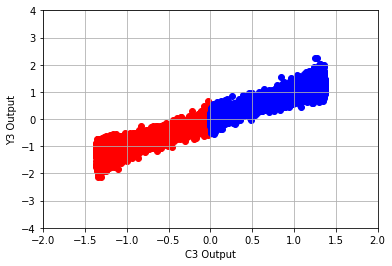

In [50]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

C3_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/C3_Output.mat')
C3_Output = C3_Output['C_Output']

Y3_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y3_Output.mat')
Y3_Output = Y3_Output['YL']


plt.scatter(C3_Output[np.where(Bit_Input==0)], Y3_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(C3_Output[np.where(Bit_Input==1)], Y3_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('C3 Output')
plt.ylabel('Y3 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-4, 4])
plt.show()

In [51]:
# Receiver does final decoding
subprocess.call('python3 RX_Feedback.py -dev_type encoder -num 3', shell= True)

Final Decoding starts
Frame: 1  BER: 0.3356

Process Ended



0

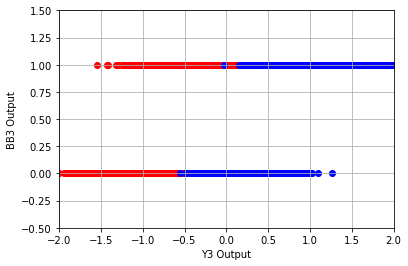

In [52]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

Y3_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y3_Output.mat')
Y3_Output = Y3_Output['YL']

BB3_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/BB3_Output.mat')
BB3_Output = BB3_Output['BB_Output']


plt.scatter(Y3_Output[np.where(Bit_Input==0)], BB3_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(Y3_Output[np.where(Bit_Input==1)], BB3_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Y3 Output')
plt.ylabel('BB3 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-0.5, 1.5])
plt.show()

In [53]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

Y1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y1_Output.mat')
Y1_Output = Y1_Output['YL']

BB3_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/BB3_Output.mat')
BB3_Output = BB3_Output['BB_Output']

D1_output = np.zeros((len(Y1_Output),1))
D2_output = np.zeros((len(BB3_Output),1))

D1_output = np.where(Y1_Output>0, D1_output, 1)
D2_output = np.where(BB3_Output>0.5, D2_output, 1)

BER1 = 1 - sum(abs(D1_output - Bit_Input))/len(Bit_Input)
BER2 = 1 - sum(abs(D2_output - Bit_Input))/len(Bit_Input)

print('Initial BER: ' , BER1)
print('Final BER: ' , BER2)

Initial BER:  [0.23744792]
Final BER:  [0.33559375]


In [54]:
subprocess.call('python3 flowgraph_process_kill.py', shell= True)


Process Successfully terminated


0

Following plots are generated
1) Actual Signal Constellation for first transmission
2) Equalized Signal Constellation for first transmission
3) Phase Corrected Constellation for first transmission
4) Channel Hist plot for first transmission

In [55]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

YUEQ1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/YUEQ1_Output.mat')
YUEQ1_Output = YUEQ1_Output['YUEQ']

YEQ1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/YEQ1_Output.mat')
YEQ1_Output = YEQ1_Output['YEQ']

YPC1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/YPC1_Output.mat')
YPC1_Output = YPC1_Output['YPC']


YUEQ1_OutputR = np.real(YUEQ1_Output)
YUEQ1_OutputI = np.imag(YUEQ1_Output)

YEQ1_OutputR = np.real(YEQ1_Output)
YEQ1_OutputI = np.imag(YEQ1_Output)

YPC1_OutputR = np.real(YPC1_Output)
YPC1_OutputI = np.imag(YPC1_Output)


YPC1_OutputNR = np.real(YPC1_OutputR)
YPC1_OutputNI = np.imag(YPC1_OutputR)

plt.figure()
plt.scatter(YUEQ1_OutputR[np.where(Bit_Input==0)], YUEQ1_OutputI[np.where(Bit_Input==0)], color = 'r')
plt.scatter(YUEQ1_OutputR[np.where(Bit_Input==1)], YUEQ1_OutputI[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Unequalized Rx')
plt.grid(True)
plt.savefig('Figures/YUEQ1.png')
plt.show()

plt.figure()
plt.scatter(YEQ1_OutputR[np.where(Bit_Input==0)], YEQ1_OutputI[np.where(Bit_Input==0)], color = 'r')
plt.scatter(YEQ1_OutputR[np.where(Bit_Input==1)], YEQ1_OutputI[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Equalized Rx')
plt.grid(True)
plt.savefig('Figures/YEQ1.png')
plt.show()

plt.figure()
plt.scatter(YPC1_OutputR[np.where(Bit_Input==0)], YPC1_OutputI[np.where(Bit_Input==0)], color = 'r')
plt.scatter(YPC1_OutputR[np.where(Bit_Input==1)], YPC1_OutputI[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Phase adjusted Rx')
plt.grid(True)
plt.savefig('Figures/YPC1.png')
plt.show()

plt.figure()
plt.scatter(YPC1_OutputNR[np.where(Bit_Input==0)], YPC1_OutputNI[np.where(Bit_Input==0)], color = 'r')
plt.scatter(YPC1_OutputNR[np.where(Bit_Input==1)], YPC1_OutputNI[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Phase adjusted Rx')
plt.grid(True)
plt.savefig('Figures/YPC1.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/YPC1_Output.mat'

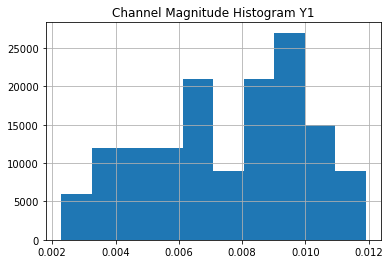

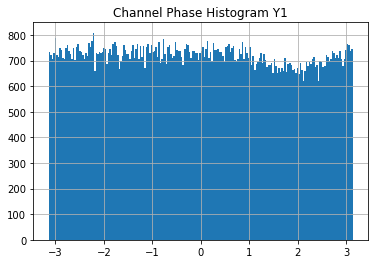

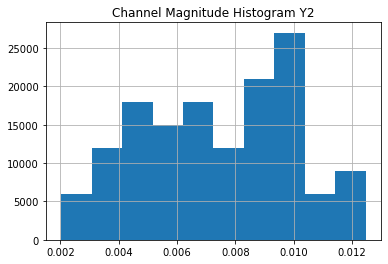

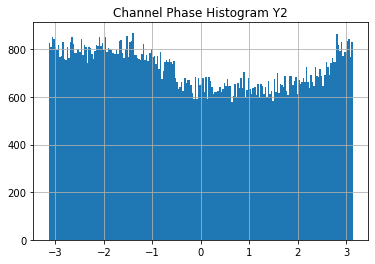

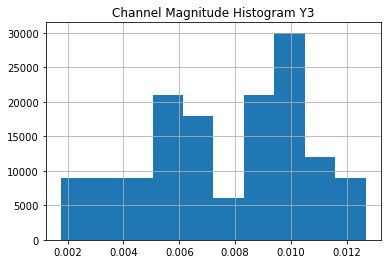

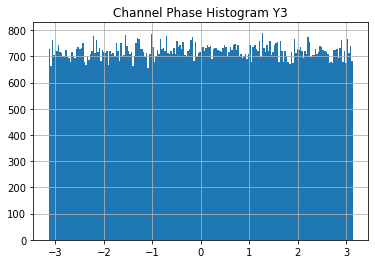

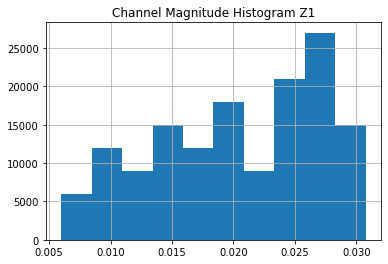

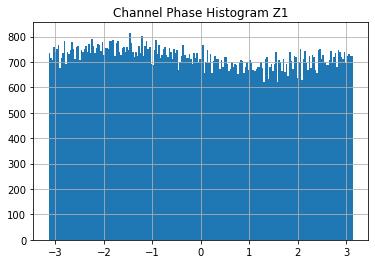

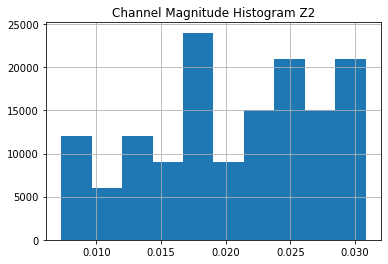

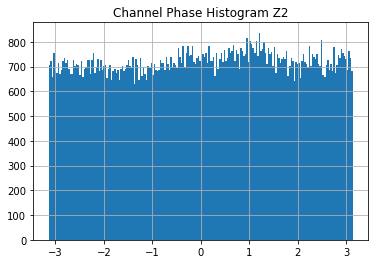

In [ ]:

for i in ['Y', 'Z']:
    for j in range(3):
        try:
            YH_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/' + i +'H'+ str(j+1) + '_Output.mat')
            YH_Output = YH_Output[i + 'H']

            YHR = np.real(YH_Output)
            YHI = np.imag(YH_Output)

            YHM = np.abs(YH_Output)
            YHP = np.angle(YH_Output)

            

            # plt.figure()
            # plt.scatter(YHR,YHI)
            # plt.xlabel('Real')
            # plt.ylabel('Imaginary')
            # plt.title('Channel')
            # plt.grid(True)
            # plt.savefig('Figures/' + i + 'H' + str(j) + '.png')
            # plt.show()

            plt.figure()
            plt.hist(YHM,10)
            plt.title('Channel Magnitude Histogram ' + i + str(j+1))
            plt.grid(True)
            plt.savefig('Figures/' + i + 'H' + str(j) + '_HIST_MAG.png')
            plt.show()

            plt.figure()
            plt.hist(YHP,200)
            plt.title('Channel Phase Histogram ' + i + str(j+1))
            plt.grid(True)
            plt.savefig('Figures/' + i + 'H' + str(j) + '_HIST_PHASE.png')
            plt.show()

        except: 
            pass

-0.00010006097602294188
0.04662553245497082


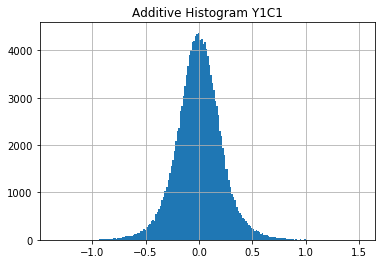

In [ ]:


C1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/C1_Output.mat')
C1_Output = C1_Output['C_Output']

Y1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y1_Output.mat')
Y1_Output = Y1_Output['YL']

Y1C1N = Y1_Output - C1_Output

print(np.mean(Y1C1N))
print(np.var(Y1C1N))

plt.figure()
plt.hist(Y1C1N,200)
plt.title('Additive Histogram Y1C1')
plt.grid(True)
plt.savefig('Figures/Y1C1_additive_noise.png')
plt.show()
